# Compute performance metrics for the given Y and Y_score without sklearn

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix #To verify the results I get for each program
# other than these two you should not import any other packages

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [3]:
def predict(y_score):
    if y_score <0.5:
        return 0
    return 1

def confusion_matrix(a):
    confusion_matrix = np.zeros([2,2]) #Assign a 2x2 Zero matrix for confusion Matrix
    #print(confusion_matrix)

    y_true = a['y'] #True values of y is the second column called y
    y_pred = a['y_pred'] #Predicted values of y is the 3rd column callled y_pred
    #print(len(y_true))
    #print(len(y_pred))

    #1st Element = True Positives
    for i in range(len(y_true)):
        if y_true[i] == 1:
            if y_true[i] == y_pred[i]:
                confusion_matrix[0][0] = confusion_matrix[0][0]+1    
    #2nd element - False Postives
    for i in range(len(y_true)):
            if y_true[i] == 0:
                if y_pred[i] == 1:
                    confusion_matrix[0][1] = confusion_matrix[0][1]+1  

    #3rd element - False Negatives
    for i in range(len(y_true)):
            if y_true[i] == 1:
                if y_pred[i] == 0:
                    confusion_matrix[1][0] = confusion_matrix[1][0]+1  
                    
    #4th element - True Negatives
    for i in range(len(y_true)):
        if y_true[i] == 0:
            if y_true[i] == y_pred[i]:
                confusion_matrix[1][1] = confusion_matrix[1][1]+1
    return confusion_matrix



In [4]:
def f1_score(confusion_matrix):
    
    TP = confusion_matrix[0][0]
    FP = confusion_matrix[0][1]
    FN = confusion_matrix[1][0]
    recall = TP/(TP+FN)
    precision = TP/(TP+FP)
    f1_score = 2 * ((precision*recall)/(precision+recall))
    return f1_score

def Accuracy_score(confusion_matrix):
    TP = confusion_matrix[0][0]
    FP = confusion_matrix[0][1]
    FN = confusion_matrix[1][0]
    TN = confusion_matrix[1][1]
    accuracy_score = (TP + TN)/ (TP + FN + TN + FP)
    return accuracy_score

In [5]:
def AreaUnderCurve(a):
  """
  THis will take the actual data frame and plot the ROC curve and calculates the AUC for that
  """
  from tqdm import tqdm
  import matplotlib.pyplot as plt
  #from sklearn import metrics
  data = a
  data = data.sort_values(by=["proba"], ascending = False)
  tpr = [0]
  fpr = [0]
  for threshold in tqdm(data['proba'].unique()):
    data["pred"] = np.where(data["proba"]>=threshold, 1,0)
    #TP
    TP = ((data["pred"]==1.0) & (data['y']==1.0)).sum()
    #print(TP)
    FP = ((data.pred == 1.0) & (data.y == 0)).sum()
    P =  (data.y==1).sum() 
    ##print(P)
    N = (data.y==0).sum()
    TPR = TP/P
    #print(TPR)
    tpr.append(TPR)
    FPR = FP/N
    fpr.append(FPR) 
  #print("\nThe lenght of TPR is ",len(tpr))
  #print("The lenght of FPR = ",len(fpr))
  plt.plot(fpr,tpr)
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curve")
  plt.show()

  AUC = np.trapz(tpr,fpr,dx=1)
    
  #print("Area by AUC we made is ",AUC)
  #false, true, thresholds = metrics.roc_curve(data['y'], data['proba']) #Check labels of the second column(prob score)
  #AREA = metrics.auc(false, true)
  #print("\n Area by sklearn is ", AREA)

  return AUC

     y     proba  y_pred
0  1.0  0.637387       1
1  1.0  0.635165       1
2  1.0  0.766586       1
3  1.0  0.724564       1
4  1.0  0.889199       1
5  1.0  0.601600       1
6  1.0  0.666323       1
7  1.0  0.567012       1
8  1.0  0.650230       1
9  1.0  0.829346       1

e confusion matrix is:  
 [[10000.   100.]
 [    0.     0.]]

he F-1 score is  0.9950248756218906
The accuracy score is  0.9900990099009901


100%|███████████████████████████████████████████████████████████████████████████| 10100/10100 [00:19<00:00, 531.00it/s]


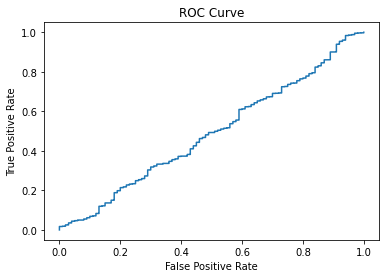


 THe area under the curve is  0.48829900000000004


In [6]:
import sklearn
a = pd.read_csv('5_a.csv')
#print(a.head(10))
y_prob = a["proba"]
y_pred = y_prob.map(predict)
a['y_pred'] = y_pred
print(a.head(10))

y_true = a['y'] #True values of y is the second column called y
y_pred = a['y_pred'] #Predicted values of y is the 3rd column callled y_pred

#skl_f1score = sklearn.metrics.f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
#CN = sklearn.metrics.confusion_matrix(y_true, y_pred, labels=None, sample_weight=None, normalize=None)
#AC = sklearn.metrics.accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)

#print("The confusion matrix from sklearn is :\n", CN)
#print("The F-1 score from sklearn is ", skl_f1score)
#print("The accuracy score from sklearn is  ",AC)


print("\ne confusion matrix is:  \n", confusion_matrix(a))
print("\nhe F-1 score is ", f1_score(confusion_matrix(a)))
print("The accuracy score is ", Accuracy_score(confusion_matrix(a)))
print("\n THe area under the curve is ", AreaUnderCurve(a))



<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

     y     proba
0  0.0  0.281035
1  0.0  0.465152
2  0.0  0.352793
3  0.0  0.157818
4  0.0  0.276648
5  0.0  0.190260
6  0.0  0.320328
7  0.0  0.435013
8  0.0  0.284849
9  0.0  0.427919

The confusion matrix is:  
 [[  55.  239.]
 [  45. 9761.]]

The F-1 score is  0.2791878172588833


  0%|▎                                                                             | 35/10100 [00:00<00:29, 343.96it/s]


The accuracy score is  0.9718811881188119


100%|███████████████████████████████████████████████████████████████████████████| 10100/10100 [00:19<00:00, 529.12it/s]


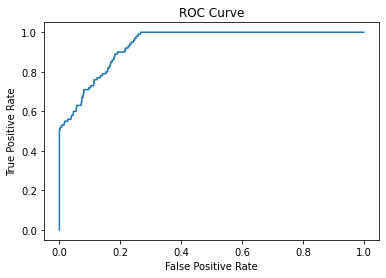


The area under the curve is  0.9377570000000001


In [7]:


import sklearn
b = pd.read_csv('5_b.csv')
print(b.head(10))
y_prob = b["proba"]
y_pred = y_prob.map(predict)
b['y_pred'] = y_pred
#print(b.head(10))

y_true = b['y'] #True values of y is the second column called y
y_pred = b['y_pred'] #Predicted values of y is the 3rd column callled y_pred

#skl_f1score = sklearn.metrics.f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
#CN = sklearn.metrics.confusion_matrix(y_true,y_pred, labels=None, sample_weight=None, normalize=None)
#AC = sklearn.metrics.accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)

#print("The confusion matrix from sklearn is :\n", CN)
#print("The F-1 score from sklearn is ", skl_f1score)
#print("The accuracy score from sklearn is  ",AC)


print("\nThe confusion matrix is:  \n", confusion_matrix(b))
print("\nThe F-1 score is ", f1_score(confusion_matrix(b)))
print("\nThe accuracy score is ", Accuracy_score(confusion_matrix(b)))
print("\nThe area under the curve is ", AreaUnderCurve(b))

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [90]:
from tqdm import tqdm
data = pd.read_csv('5_c.csv')
print(c.head(10))

data = data.sort_values(by= ["prob"], ascending = False)

metricA =[]
thresholds = list(data['prob'].unique())
A_dict ={}
for threshold in tqdm(thresholds):
    data["pred"] = np.where(data["prob"]>=threshold, 1,0)
    FP = ((data.pred == 1.0) & (data.y == 0)).sum()
    FN = ((data.pred== 0) &(data.y == 1.0)).sum()
    MetricA = ((500*FN) + (100*FP))
    metricA.append(MetricA)
    A_dict[threshold] = MetricA  # Creating a dict. of thresholds as keys and MetricA as its value
    
#print(list(data['prob'].unique()))    
#print(len(A_dict))
min_A = min(metricA) #Smallest value of A
for key, value in A_dict.items(): #Extracting the threshold (key)for the smallest A value.
     if value == min_A:
        print("THe  smallest value of A = {} and the threshold we get this value is {}".format(value, key))



  5%|████                                                                          | 145/2791 [00:00<00:03, 672.15it/s]

   y      prob
0  0  0.458521
1  0  0.505037
2  0  0.418652
3  0  0.412057
4  0  0.375579
5  0  0.595387
6  0  0.370288
7  0  0.299273
8  0  0.297000
9  0  0.266479


100%|████████████████████████████████████████████████████████████████████████████| 2791/2791 [00:02<00:00, 1032.89it/s]

THe  smallest value of A = 141000 and the threshold we get this value is 0.2300390278970873


<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [83]:
import sklearn
d = pd.read_csv('5_d.csv')
print(d.head(10))

y_true = d['y']
y_pred = d['pred']

d["error"] = (d['pred'] - d['y'])
d["error_square"] = d['error']**2
#print(d.head())

print("\nThe mean square error is ", d['error_square'].mean(axis=0))

#MQE =sklearn.metrics.mean_squared_error(y_true, y_pred, sample_weight=None, multioutput='uniform_average', squared=True)
#print ("\nThe mean square error from sklearn is :" ,MQE)

#MAPE = ((sum of absolute errors)/(sum of all actual values)) :Modified MAPE to avoid a value of a=0
absolute_error= [abs(x) for x in list(d["error"])]
absolute_error_sum = sum(absolute_error)
actual_values_sum = d['y'].sum(axis=0)
MAPE = (absolute_error_sum/actual_values_sum)*100
print("The value of Modified MAPE in percentage is", MAPE)

#SS_total(Sum of squares = sigmna 1/n ((yi-ybar)**2) where ybar is average of all yi
y_bar = d["y"].mean()
d["SS_total"] = (d["y"]-y_bar)**2
SS_total = d["SS_total"].mean()

##SS_residual  = (yi-y_pred)**2
d["SS_residual"] = (d["y"]-d["pred"])**2
SS_residual = d["SS_residual"].mean()

R_square_error = 1-(SS_residual/SS_total)
print("The R squared error is ", R_square_error)



       y   pred
0  101.0  100.0
1  120.0  100.0
2  131.0  113.0
3  164.0  125.0
4  154.0  152.0
5  133.0  153.0
6  148.0  139.0
7  172.0  145.0
8  153.0  162.0
9  162.0  154.0

The mean square error is  177.16569974554707
The value of Modified MAPE in percentage is 12.91202994009687
The R squared error is  0.9563582786990964


In [ ]:
## WAY TO MAKE BALANCED DATASET FROM IMBALANCED DATASET BY DROPPING DATA
import random
data = pd.read_csv("5_a.csv")
negative = data[data.y==0]
print(len(negative))
print(new_data.head())
positives = data[data.y==1]
print("NUmner of positive samples = ", len(positive))
indices= random.sample(range(len(positive)),100)
positive = positives.iloc[indices,:]
print(positive.head())
new_data = pd.concat([positive,negative])
print(len(new_data))
print("Area under cure",AreaUnderCurve(new_data))